In [27]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use('dark_background')

rts_gmlc_dir = Path("/Users/dguittet/Projects/Dispatches/workspace/prescient_runs/simulate_with_network_with_uncertainty_w_10_reserves")
rts_gmlc_data = Path("/Users/dguittet/Projects/Dispatches/Prescient/downloads/rts_gmlc/RTS-GMLC/RTS_Data/SourceData")

bus_detail_df = pd.read_csv(rts_gmlc_dir / "bus_detail.csv")
bus_detail_df['LMP'] = bus_detail_df['LMP'].astype('float64')
bus_detail_df['LMP DA'] = bus_detail_df['LMP DA'].astype('float64')
print(bus_detail_df.columns)

source_detail_df = pd.read_csv(rts_gmlc_data / "gen.csv")
bus_names = pd.read_csv(rts_gmlc_data / "bus.csv")

Index(['Date', 'Hour', 'Minute', 'Bus', 'Demand', 'Shortfall',
       'Overgeneration', 'LMP', 'LMP DA'],
      dtype='object')


In [2]:
# compile bus id to name dict

bus_dict = {k: v for k, v in zip(bus_names['Bus ID'].values, bus_names['Bus Name'].values)}


In [3]:
zeroLMP_per_bus = {}
for bus in bus_detail_df['Bus'].unique():
    df_bus = bus_detail_df[bus_detail_df['Bus'] == bus]
    total_curtailment = df_bus[df_bus['LMP'] < 3]['LMP']
    zeroLMP_per_bus[bus] = len(total_curtailment)

zeroLMP_per_bus = {k: v for k, v in sorted(zeroLMP_per_bus.items(), key=lambda item: item[1])}
max_zeroLMP = max(v for k, v in zeroLMP_per_bus.items())
zeroLMP_per_bus


{'Abel': 1973,
 'Adams': 1973,
 'Agricola': 1973,
 'Aiken': 1973,
 'Alber': 1973,
 'Alder': 1973,
 'Alger': 1973,
 'Ali': 1973,
 'Allen': 1973,
 'Anna': 1973,
 'Archer': 1973,
 'Arne': 1973,
 'Attila': 1973,
 'Austen': 1973,
 'Bach': 1973,
 'Bacon': 1973,
 'Baffin': 1973,
 'Bailey': 1973,
 'Bain': 1973,
 'Bajer': 1973,
 'Baker': 1973,
 'Balch': 1973,
 'Balzac': 1973,
 'Banks': 1973,
 'Bardeen': 1973,
 'Barkla': 1973,
 'Barlow': 1973,
 'Barry': 1973,
 'Barton': 1973,
 'Basov': 1973,
 'Bates': 1973,
 'Bayle': 1973,
 'Bede': 1973,
 'Beethoven': 1973,
 'Behring': 1973,
 'Bell': 1973,
 'Bloch': 1973,
 'Bordet': 1973,
 'Adler': 1976,
 'Arnold': 1976,
 'Arthur': 1976,
 'Asser': 1976,
 'Attar': 1976,
 'Avery': 1976,
 'Curtiss': 1989,
 'Attlee': 1990,
 'Comte': 1992,
 'Clive': 2000,
 'Carew': 2006,
 'Carrel': 2006,
 'Caxton': 2006,
 'Cecil': 2006,
 'Camus': 2007,
 'Carter': 2007,
 'Caruso': 2007,
 'Cabell': 2008,
 'Cabot': 2008,
 'Caine': 2008,
 'Calvin': 2008,
 'Cary': 2008,
 'Chain': 2008,
 '

Text(0.5, 0.98, 'LMPs at Aubrey')

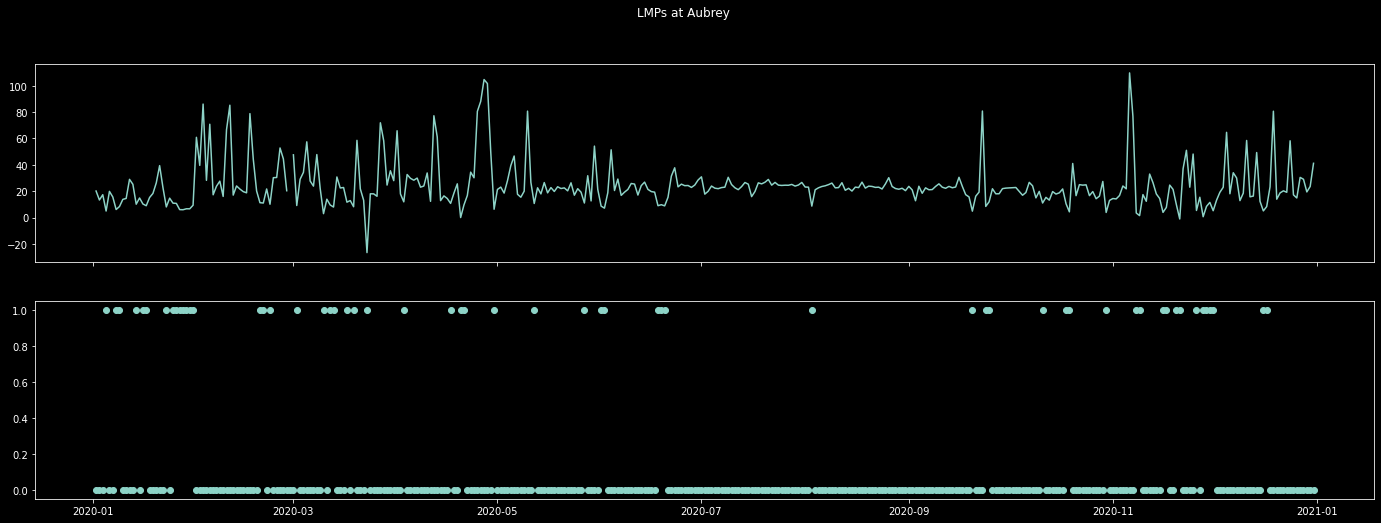

In [4]:
bus = "Aubrey"
start_date = pd.Timestamp('2020-01-02 00:00:00')
ix = pd.date_range(start=start_date, 
                    end=start_date
                    + pd.offsets.DateOffset(days=365)
                    - pd.offsets.DateOffset(hours=1),
                    freq='1H')
ix = ix[(ix.day != 29) | (ix.month != 2)]
df_bus = pd.DataFrame(index=ix)
df_bus['LMP'] = [min(i, 200) for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]
df_bus['low LMP'] = [1 if i < 5 else 0 for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]

fig, ax = plt.subplots(2,1,figsize=(24, 8),sharex=True)
df_resampled = df_bus.resample('1D').mean()
df_resampled['low LMP'] = [1 if i < 12 else 0 for i in df_resampled['LMP'].values]

ax[0].plot(df_resampled['LMP'])
ax[1].scatter(df_resampled['low LMP'].index, df_resampled['low LMP'])
plt.suptitle(f"LMPs at {bus}")

Text(0.5, 0.98, 'LMPs at Caesar')

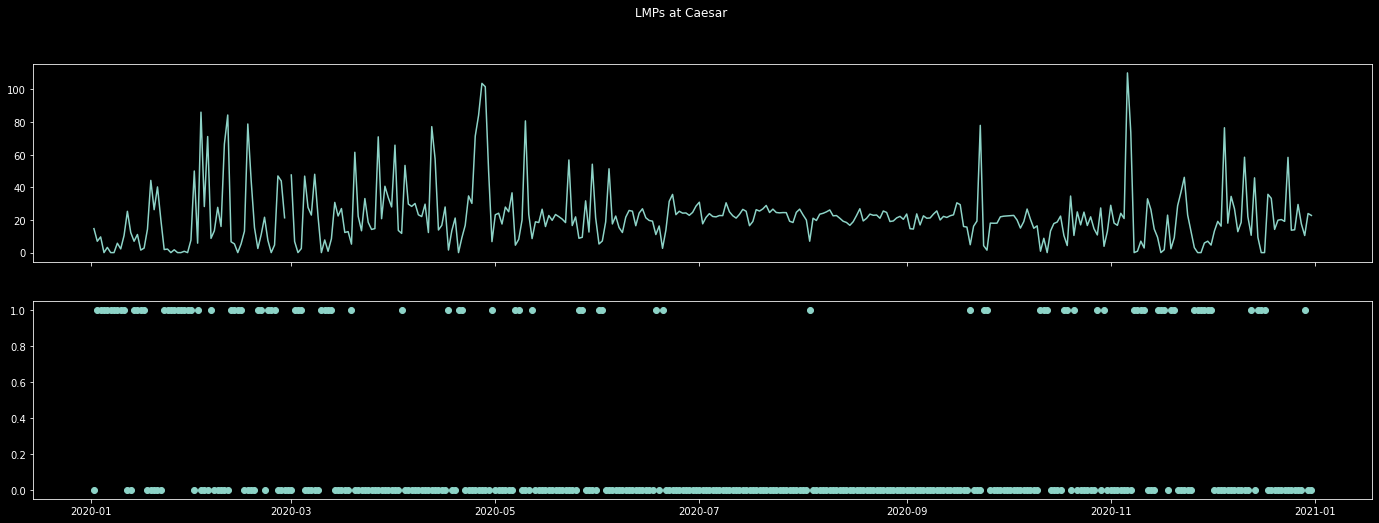

In [5]:
bus = "Caesar"
start_date = pd.Timestamp('2020-01-02 00:00:00')
ix = pd.date_range(start=start_date, 
                    end=start_date
                    + pd.offsets.DateOffset(days=365)
                    - pd.offsets.DateOffset(hours=1),
                    freq='1H')
ix = ix[(ix.day != 29) | (ix.month != 2)]
df_bus = pd.DataFrame(index=ix)
df_bus['LMP'] = [min(i, 200) for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]
df_bus['low LMP'] = [1 if i < 5 else 0 for i in bus_detail_df[bus_detail_df['Bus'] == bus]['LMP'].values]

fig, ax = plt.subplots(2,1,figsize=(24, 8),sharex=True)
df_resampled = df_bus.resample('1D').mean()
df_resampled['low LMP'] = [1 if i < 12 else 0 for i in df_resampled['LMP'].values]

ax[0].plot(df_resampled['LMP'])
ax[1].scatter(df_resampled['low LMP'].index, df_resampled['low LMP'])
plt.suptitle(f"LMPs at {bus}")

122_WIND_1 210285.42112299975 294.7237857365098
303_WIND_1 350488.51467999985 473.31332164753525
309_WIND_1 4795.872777000008 32.33899377612952
317_WIND_1 377641.32283999963 472.5833097734947


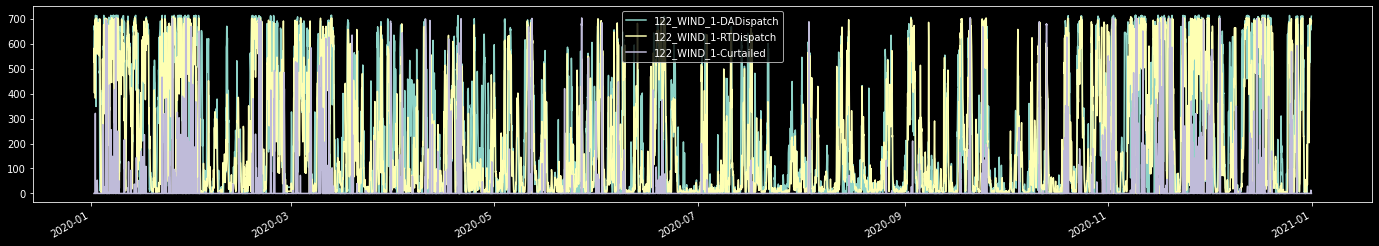

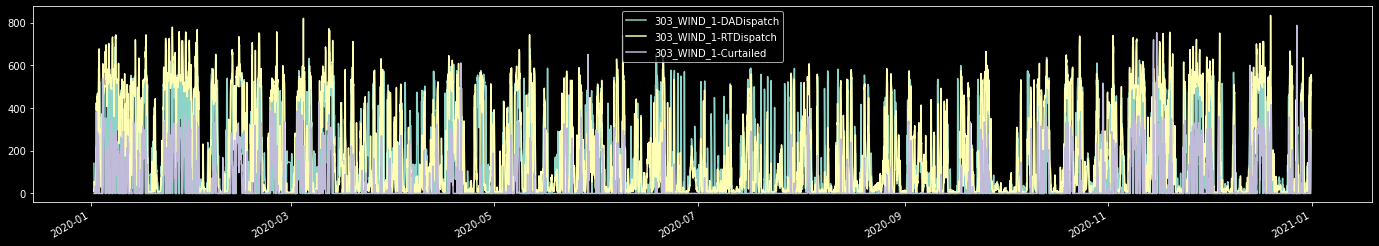

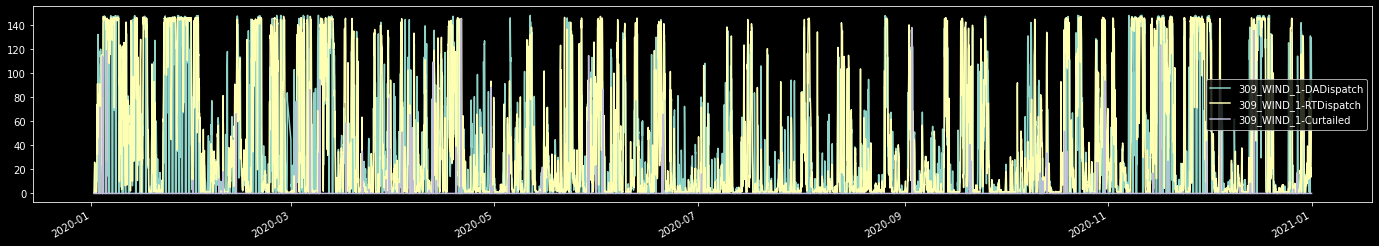

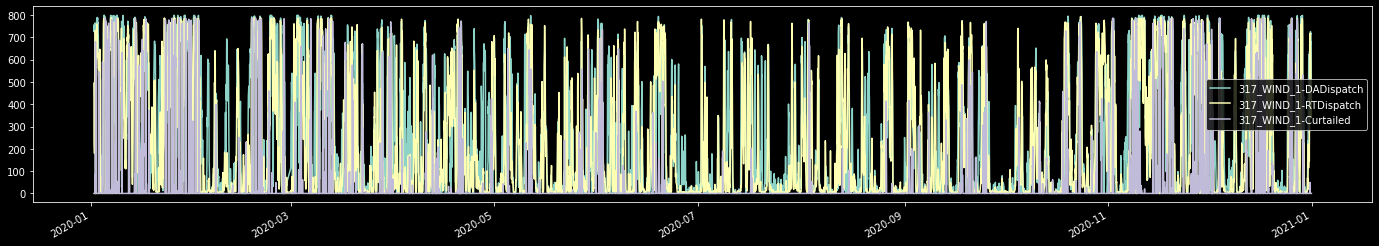

In [16]:
renewables_df = pd.read_csv(rts_gmlc_dir / "renewables_detail.csv")
df_curtailment = pd.DataFrame(index=ix)
wind_gens = []
for gen in renewables_df['Generator'].unique():
    if 'WIND' in gen:
        df_gen = pd.DataFrame(index=ix)
        df_gen[gen+"-DADispatch"] = renewables_df[renewables_df['Generator'] == gen]['Output DA'].values
        df_gen[gen+"-RTDispatch"] = renewables_df[renewables_df['Generator'] == gen]['Output'].values
        df_gen[gen+"-Curtailed"] = renewables_df[renewables_df['Generator'] == gen]['Curtailment'].values
        print(gen, sum(df_gen[gen+"-Curtailed"]), sum(df_gen[gen+"-Curtailed"]) / max(df_gen[gen+"-DADispatch"]))
        df_gen.plot(figsize=(24,4))
        df_curtailment = pd.concat([df_curtailment, df_gen], axis=1)
        wind_gens.append(gen)


In [17]:
bus_of_interest = [122, 303, 309, 317]
gens_at_bus = {}
for bus in bus_of_interest:
    gens_at_bus[bus] = source_detail_df[source_detail_df['Bus ID'] == bus]['GEN UID']

source_detail_df[source_detail_df['GEN UID'] == '309_WIND_1']

,GEN UID,Bus ID,Gen ID,Unit Group,Unit Type,Category,Fuel,MW Inj,MVAR Inj,V Setpoint p.u.,...,Emissions N2O Lbs/MMBTU,Emissions CO Lbs/MMBTU,Emissions VOCs Lbs/MMBTU,Damping Ratio,Inertia MJ/MW,Base MVA,Transformer X p.u.,Unit X p.u.,Pump Load MW,Storage Roundtrip Efficiency
153,309_WIND_1,309,1,WIND,WIND,Wind,Wind,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0.0,148.3,0.0,0.0,0,0


In [18]:
# get LMPs at buses with wind
print(bus_detail_df.columns)
df_lmps = pd.DataFrame(index=ix)
for wind_gen in wind_gens:
    bus_id = wind_gen.split('_')[0]
    bus_name = bus_dict[int(bus_id)]
    df_lmps[f"{bus_id}_RTLMP"] = bus_detail_df[bus_detail_df['Bus'] == bus_name]['LMP'].values
    df_lmps[f"{bus_id}_DALMP"] = bus_detail_df[bus_detail_df['Bus'] == bus_name]['LMP DA'].values

Index(['Date', 'Hour', 'Minute', 'Bus', 'Demand', 'Shortfall',
       'Overgeneration', 'LMP', 'LMP DA'],
      dtype='object')


In [19]:
import numpy as np

thermal_df = pd.read_csv(rts_gmlc_dir / 'thermal_detail.csv')
df_thermal_dispatch = pd.DataFrame(index=ix)
for thermal_gen in thermal_df['Generator'].unique():
    if "NUCLEAR" in thermal_gen or "STEAM" in thermal_gen:
        continue
    df_thermal_dispatch[thermal_gen+"-DADispatch"] = thermal_df[thermal_df['Generator'] == thermal_gen]['Dispatch DA'].values
    df_thermal_dispatch[thermal_gen+"-RTDispatch"] = thermal_df[thermal_df['Generator'] == thermal_gen]['Dispatch'].values

on_when_LMP_high = {}
for thermal_gen in thermal_df['Generator'].unique():
    if "NUCLEAR" in thermal_gen or "STEAM" in thermal_gen:
        continue
    on_when_LMP_high[thermal_gen] = {
        'dispatched energy' : (1 - df_bus['low LMP']) * df_thermal_dispatch[thermal_gen+"-DADispatch"].values,
        'dispatched timesteps' : (1 - df_bus['low LMP']) * np.array([1 if i > 0 else 0 for i in df_thermal_dispatch[thermal_gen+"-DADispatch"].values]),
        }
for item in on_when_LMP_high.items():
    print(item[0], sum(item[1]['dispatched timesteps']))
on_when_LMP_high = {k: v for k, v in sorted(on_when_LMP_high.items(), key=lambda item: -sum(item[1]['dispatched timesteps']))}
on_when_LMP_high

101_CT_1 97
101_CT_2 100
102_CT_1 6
102_CT_2 2
107_CC_1 3373
113_CT_1 16
113_CT_2 12
113_CT_3 21
113_CT_4 0
118_CC_1 3660
123_CT_1 44
123_CT_4 44
123_CT_5 42
201_CT_1 30
201_CT_2 20
202_CT_1 41
202_CT_2 42
207_CT_1 0
207_CT_2 3
213_CC_3 1172
213_CT_1 7
213_CT_2 14
215_CT_4 7
215_CT_5 0
218_CC_1 228
221_CC_1 4676
223_CT_4 0
223_CT_5 0
223_CT_6 0
301_CT_1 12
301_CT_2 5
301_CT_3 6
301_CT_4 3
302_CT_1 13
302_CT_2 8
302_CT_3 0
302_CT_4 5
307_CT_1 24
307_CT_2 16
313_CC_1 3663
315_CT_6 281
315_CT_7 274
315_CT_8 264
318_CC_1 913
321_CC_1 3676
322_CT_5 88
322_CT_6 80
323_CC_1 2200
323_CC_2 2187


{'221_CC_1': {'dispatched energy': 2020-01-02 00:00:00    0.0
  2020-01-02 01:00:00    0.0
  2020-01-02 02:00:00    0.0
  2020-01-02 03:00:00    0.0
  2020-01-02 04:00:00    0.0
                        ... 
  2020-12-31 19:00:00    0.0
  2020-12-31 20:00:00    0.0
  2020-12-31 21:00:00    0.0
  2020-12-31 22:00:00    0.0
  2020-12-31 23:00:00    0.0
  Name: low LMP, Length: 8736, dtype: float64,
  'dispatched timesteps': 2020-01-02 00:00:00    0
  2020-01-02 01:00:00    0
  2020-01-02 02:00:00    0
  2020-01-02 03:00:00    0
  2020-01-02 04:00:00    0
                        ..
  2020-12-31 19:00:00    0
  2020-12-31 20:00:00    0
  2020-12-31 21:00:00    0
  2020-12-31 22:00:00    0
  2020-12-31 23:00:00    0
  Name: low LMP, Length: 8736, dtype: int64},
 '321_CC_1': {'dispatched energy': 2020-01-02 00:00:00    0.0
  2020-01-02 01:00:00    0.0
  2020-01-02 02:00:00    0.0
  2020-01-02 03:00:00    0.0
  2020-01-02 04:00:00    0.0
                        ... 
  2020-12-31 19:00:00    0.

Text(0.5, 0.98, 'Whether or not Thermal Generators are On at Each Hour')

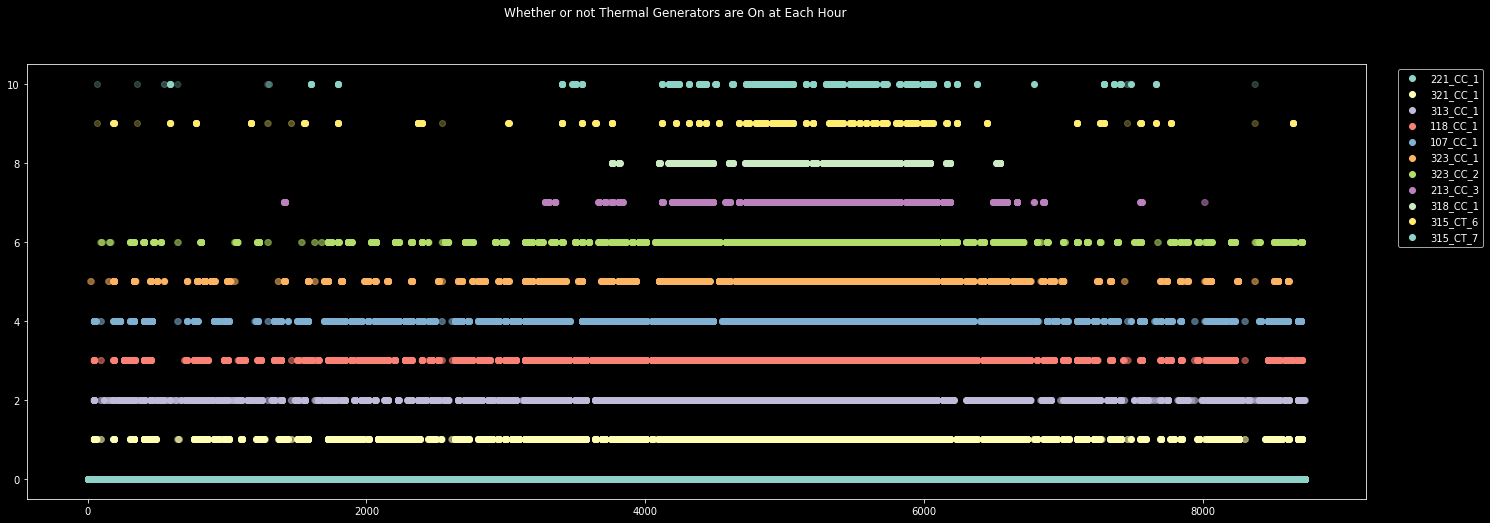

In [20]:
fig, ax = plt.subplots(1,1,figsize=(24, 8),sharex=True)
n = 0
for k, v in on_when_LMP_high.items():
    if "STEAM" not in k:
        if n > 10:
            break
        dispatch_total = [n if i > 0 else 0 for i in thermal_df[thermal_df['Generator'] == k]['Dispatch DA'].values]
        p = ax.scatter(range(8736), v['dispatched timesteps'] * n, label=k)
        ax.scatter(range(8736), dispatch_total, alpha=0.1, color=p.get_facecolor())
        n += 1
    
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.suptitle("Whether or not Thermal Generators are On at Each Hour")

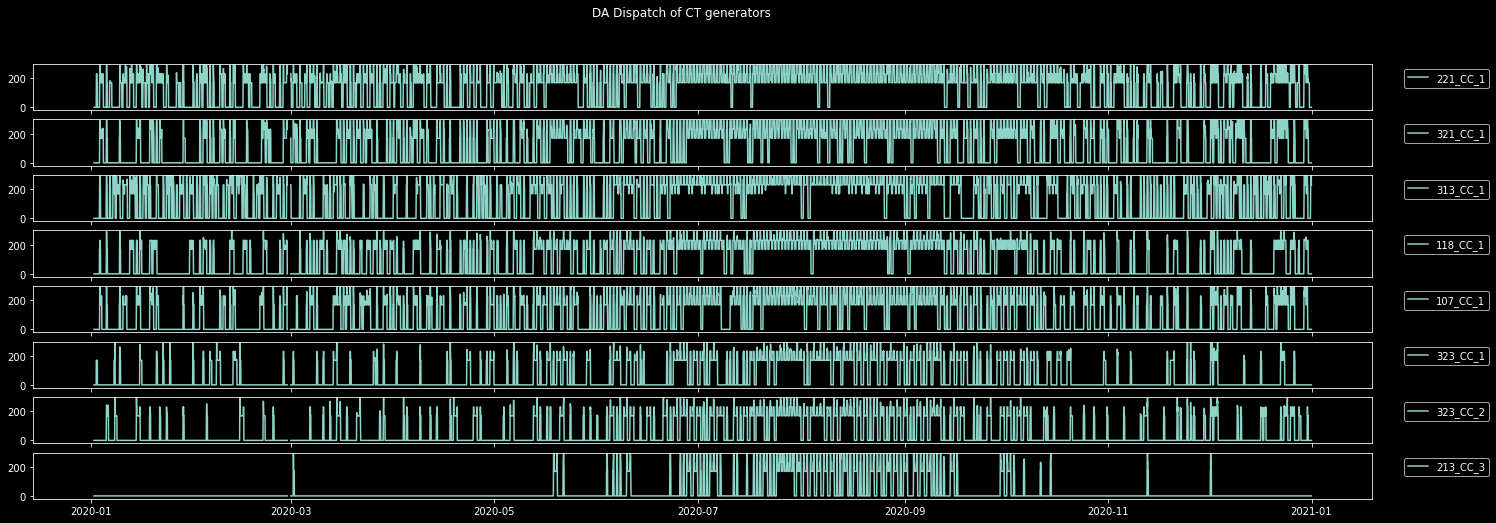

In [21]:
df_thermal_dispatch_copy = df_thermal_dispatch.copy()
fig, ax = plt.subplots(8,1,figsize=(24, 8),sharex=True)
n = 0
for k, v in on_when_LMP_high.items():
    if n >= len(ax):
        df_thermal_dispatch_copy.drop(k+'-DADispatch', inplace=True, axis=1)
        df_thermal_dispatch_copy.drop(k+'-RTDispatch', inplace=True, axis=1)
        continue
    dispatch_total = df_thermal_dispatch_copy[k+"-DADispatch"].resample('1H').mean()
    # p = ax.scatter(range(8736), v['dispatched timesteps'] * n, label=k)
    # ax.scatter(range(8736), dispatch_total, alpha=0.1, color=p.get_facecolor())
    ax[n].plot(dispatch_total, label=k)
    ax[n].legend(bbox_to_anchor=(1.02,1), loc="upper left")
    ax[n].set_ylim(-20, 300)
    n += 1
    
    plt.suptitle("DA Dispatch of CT generators")

Text(0.5, 0.98, 'Wind DA and Curtailed')

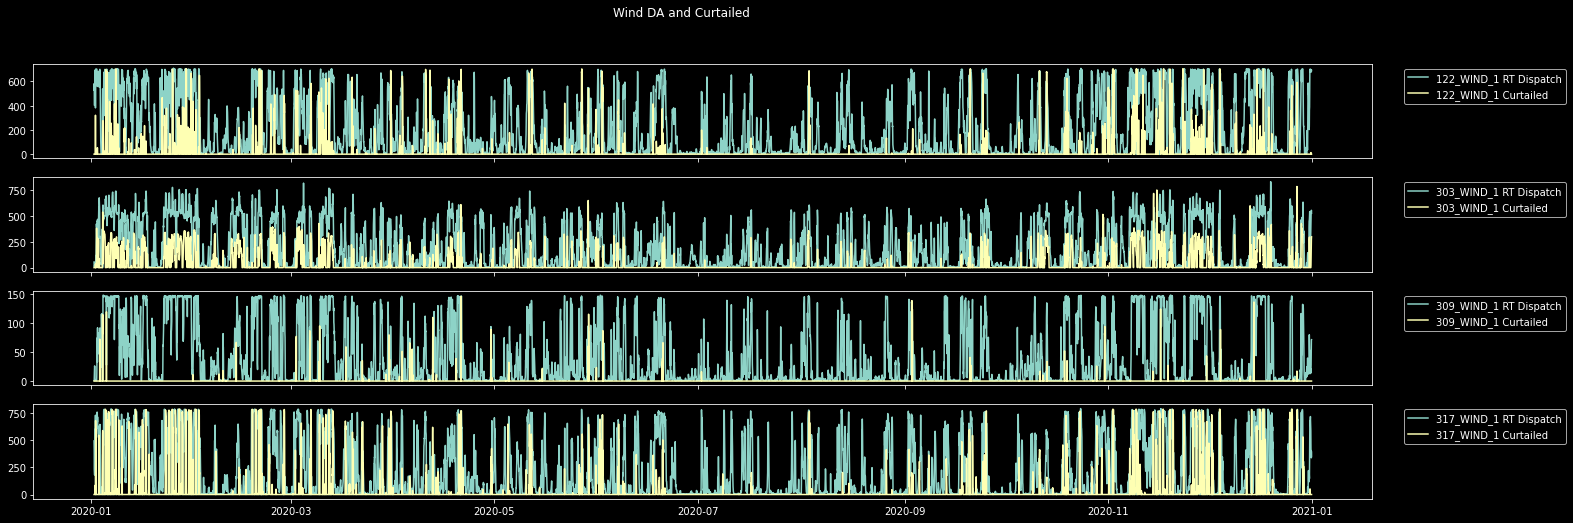

In [22]:
fig, ax = plt.subplots(4,1,figsize=(24, 8),sharex=True)
n = 0
wind_gen = ('122_WIND_1', '303_WIND_1', '309_WIND_1', '317_WIND_1')

for k in wind_gen:
    dispatch_total = df_curtailment[k+"-RTDispatch"]
    p = ax[n].plot(dispatch_total, label=k+" RT Dispatch")
    ax[n].plot(df_curtailment[k+"-Curtailed"], label=k+" Curtailed")
    ax[n].legend(bbox_to_anchor=(1.02,1), loc="upper left")
    n += 1
    
plt.suptitle("Wind DA and Curtailed")

In [23]:
# Compile Wind Power Forecast and Actuals and CF: take "forward window average" of RT
wind_rt_df = pd.read_csv(rts_gmlc_data.parent / "timeseries_data_files" / "WIND" / "REAL_TIME_wind.csv")
wind_df = pd.DataFrame(index=ix)
for k in wind_rt_df.columns:
    if "WIND" not in k:
        continue
    rt_wind = wind_rt_df[k].values[276: 276 + 8736 * 12]
    rt_wind = np.reshape(rt_wind, (8736, 12))
    rt_wind = rt_wind.mean(1)
    wind_df[k+"-RTPower"] = rt_wind

wind_da_df = pd.read_csv(rts_gmlc_data.parent / "timeseries_data_files" / "WIND" / "DAY_AHEAD_wind.csv")
for k in wind_da_df.columns:
    if "WIND" not in k:
        continue
    da_wind = wind_da_df[k].values[23:23 + 8736]
    wind_df[k+"-DAPower"] = da_wind

gen_df = pd.read_csv(rts_gmlc_data / "gen.csv")
for gen in wind_gen:
    wind_pmax = gen_df[gen_df['GEN UID'] == gen]['PMax MW'].values[0]
    wind_df[gen+"-RTCF"] = wind_df[gen+"-RTPower"] / wind_pmax
    wind_df[gen+"-DACF"] = wind_df[gen+"-DAPower"] / wind_pmax
wind_df

,309_WIND_1-RTPower,317_WIND_1-RTPower,303_WIND_1-RTPower,122_WIND_1-RTPower,309_WIND_1-DAPower,317_WIND_1-DAPower,303_WIND_1-DAPower,122_WIND_1-DAPower,122_WIND_1-RTCF,122_WIND_1-DACF,303_WIND_1-RTCF,303_WIND_1-DACF,309_WIND_1-RTCF,309_WIND_1-DACF,317_WIND_1-RTCF,317_WIND_1-DACF
2020-01-02 00:00:00,0.833333,494.966667,54.333333,527.183333,0.1,729.1,141.1,568.4,0.738869,0.796636,0.064148,0.166588,0.005619,0.000674,0.619405,0.912401
2020-01-02 01:00:00,1.166667,416.625000,14.700000,582.150000,0.8,757.1,52.6,630.0,0.815907,0.882971,0.017355,0.062102,0.007867,0.005394,0.521368,0.947441
2020-01-02 02:00:00,15.208333,233.875000,7.716667,462.466667,2.7,753.4,17.4,672.3,0.648166,0.942256,0.009111,0.020543,0.102551,0.018206,0.292673,0.942811
2020-01-02 03:00:00,19.233333,200.866667,13.700000,402.816667,11.4,734.3,8.9,661.3,0.564564,0.926840,0.016175,0.010508,0.129692,0.076871,0.251366,0.918909
2020-01-02 04:00:00,26.016667,179.416667,18.491667,402.341667,18.3,724.2,7.0,654.0,0.563899,0.916608,0.021832,0.008264,0.175433,0.123399,0.224523,0.906270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,25.183333,410.758333,530.625000,705.466667,113.4,717.4,724.8,658.3,0.988741,0.922635,0.626476,0.855726,0.169813,0.764666,0.514026,0.897760
2020-12-31 20:00:00,28.133333,409.525000,647.808333,679.308333,96.9,670.0,784.2,677.5,0.952079,0.949544,0.764827,0.925856,0.189706,0.653405,0.512483,0.838443
2020-12-31 21:00:00,62.258333,338.533333,782.733333,679.683333,129.5,680.4,820.8,705.7,0.952605,0.989068,0.924124,0.969067,0.419813,0.873230,0.423643,0.851458
2020-12-31 22:00:00,69.983333,398.516667,829.891667,682.800000,101.1,581.9,829.3,709.5,0.956973,0.994394,0.979801,0.979103,0.471904,0.681726,0.498707,0.728194


In [24]:
df_all = pd.concat([df_lmps, df_thermal_dispatch, df_curtailment, wind_df], axis=1)
df_all.to_csv(rts_gmlc_dir / "Wind_Thermal_Dispatch.csv")
print(df_all.columns)
df_all

Index(['122_RTLMP', '122_DALMP', '303_RTLMP', '303_DALMP', '309_RTLMP',
       '309_DALMP', '317_RTLMP', '317_DALMP', '101_CT_1-DADispatch',
       '101_CT_1-RTDispatch',
       ...
       '303_WIND_1-DAPower', '122_WIND_1-DAPower', '122_WIND_1-RTCF',
       '122_WIND_1-DACF', '303_WIND_1-RTCF', '303_WIND_1-DACF',
       '309_WIND_1-RTCF', '309_WIND_1-DACF', '317_WIND_1-RTCF',
       '317_WIND_1-DACF'],
      dtype='object', length=134)


,122_RTLMP,122_DALMP,303_RTLMP,303_DALMP,309_RTLMP,309_DALMP,317_RTLMP,317_DALMP,101_CT_1-DADispatch,101_CT_1-RTDispatch,...,303_WIND_1-DAPower,122_WIND_1-DAPower,122_WIND_1-RTCF,122_WIND_1-DACF,303_WIND_1-RTCF,303_WIND_1-DACF,309_WIND_1-RTCF,309_WIND_1-DACF,317_WIND_1-RTCF,317_WIND_1-DACF
2020-01-02 00:00:00,22.492903,21.116340,22.492903,21.116340,22.492903,21.116340,22.492903,21.116340,0.0,0.0,...,141.1,568.4,0.738869,0.796636,0.064148,0.166588,0.005619,0.000674,0.619405,0.912401
2020-01-02 01:00:00,21.843871,20.400000,21.843871,20.400000,21.843871,20.400000,21.843871,20.400000,0.0,0.0,...,52.6,630.0,0.815907,0.882971,0.017355,0.062102,0.007867,0.005394,0.521368,0.947441
2020-01-02 02:00:00,23.437857,19.429677,23.437857,19.429677,23.437857,19.429677,23.437857,19.429677,0.0,0.0,...,17.4,672.3,0.648166,0.942256,0.009111,0.020543,0.102551,0.018206,0.292673,0.942811
2020-01-02 03:00:00,73.437857,19.689677,73.437857,19.689677,73.437857,19.689677,73.437857,19.689677,0.0,0.0,...,8.9,661.3,0.564564,0.926840,0.016175,0.010508,0.129692,0.076871,0.251366,0.918909
2020-01-02 04:00:00,73.437857,19.689677,73.437857,19.689677,73.437857,19.689677,73.437857,19.689677,0.0,0.0,...,7.0,654.0,0.563899,0.916608,0.021832,0.008264,0.175433,0.123399,0.224523,0.906270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,-0.000002,54.932941,0.000001,-0.000001,120.730633,83.371221,70.226843,48.861138,0.0,0.0,...,724.8,658.3,0.988741,0.922635,0.626476,0.855726,0.169813,0.764666,0.514026,0.897760
2020-12-31 20:00:00,77.337215,74.650272,0.000000,0.000001,117.373980,113.296031,68.789041,66.399089,0.0,0.0,...,784.2,677.5,0.952079,0.949544,0.764827,0.925856,0.189706,0.653405,0.512483,0.838443
2020-12-31 21:00:00,75.295391,25.512743,-0.000000,0.000000,114.275123,38.720456,66.972902,22.692789,0.0,0.0,...,820.8,705.7,0.952605,0.989068,0.924124,0.969067,0.419813,0.873230,0.423643,0.851458
2020-12-31 22:00:00,74.814047,0.000000,0.000001,0.000001,113.544591,71.628067,66.544761,41.664761,0.0,0.0,...,829.3,709.5,0.956973,0.994394,0.979801,0.979103,0.471904,0.681726,0.498707,0.728194
